<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# 기본 환경설정 및 함수들을 function.py에 별도로 작성 후 import 하여 사용
from functions import *    # 공통 함수들
default_config()       # matplotlib 폰트 & 한글 설정, 일관된 출력을 위해 유사난수 초기화(np.random.seed(42))

In [2]:
# 데이터 추출(다운로드 & 압축 해제) 
fetch_housing_data()

In [3]:
# 데이터 읽어 들이기
housing = load_housing_data()

In [4]:
# 처음 다섯 행 데이터 확인하기
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# 데이터에 대한 간략한 설명과 전체 행/컬럼 수, 특성별 데이터 타입, Null이 아닌 값의 개수 확인하기
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# 범주형 특성의 카테고리 확인하기
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
# 숫자형 특성의 요약 정보 보기
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


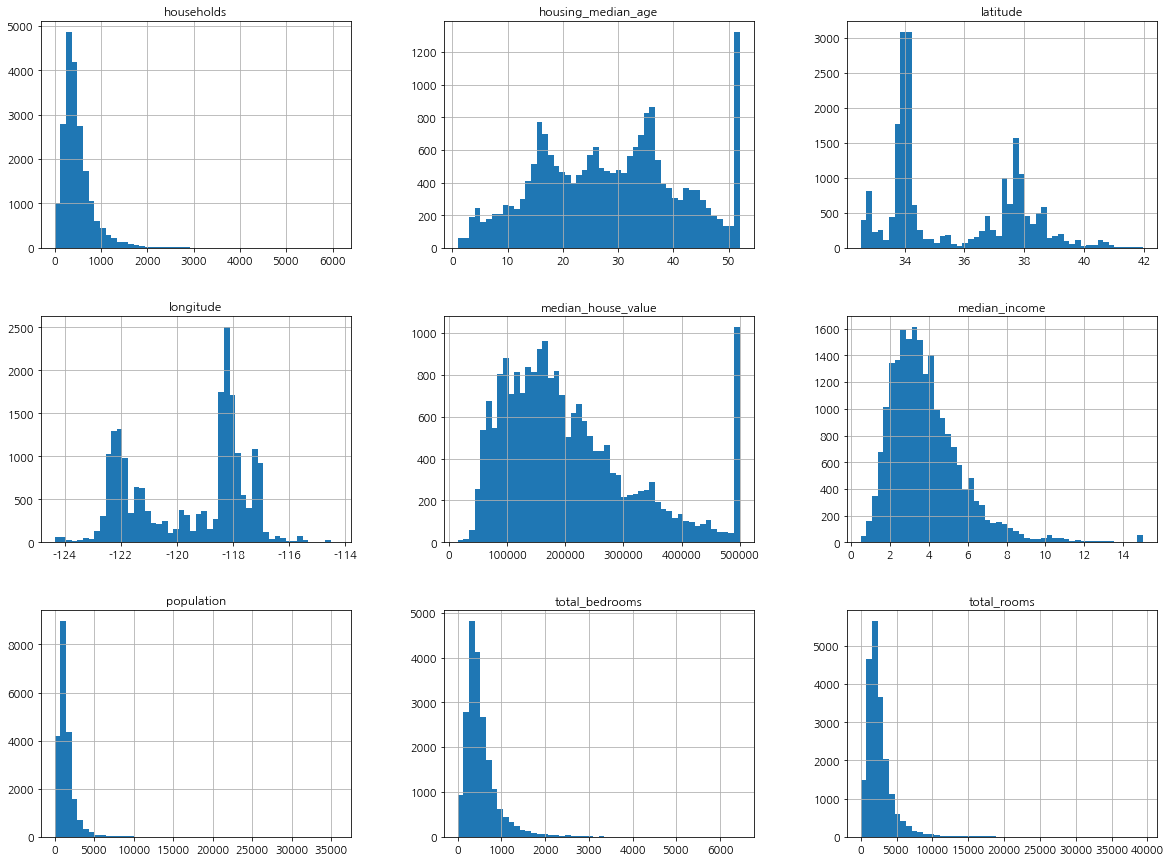

In [8]:
# 숫자형 특성의 히스토그램 그려 보기
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.rcParams['axes.labelsize'] = 14
# plt.show()       # 생략해도 셀이 실행될 때 주피터 노트북이 자동으로 그래프를 그려줌

In [121]:
# simple test data split function (업데이트 된 데이터 세트를 사용하면 문제가 됨)
def split_train_test(data, test_ratio):
    np.random.seed(42)     # 프로그램을 다시 실행해도 같은 테스트 세트가 생성되도록 난수 발생기 초기값 설정
    suffled_indices = np.random.permutation(len(data))       # 0 부터 len(data)-1 까지의 랜덤하게 섞인 인덱스 값을 만듦
    test_set_size = int(len(data) * test_ratio)
    test_indices = suffled_indices[:test_set_size]
    train_indices = suffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [122]:
housing_train, housing_test = split_train_test(housing, 0.2)
print(len(housing_train), "train + ", len(housing_test), "test")
display(housing_train.head())

16512 train +  4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [123]:
# 샘플의 해시 값을 이용한 테스트 세트 만들기
from zlib import crc32      # CRC32 해시값 구하는 함수(32비트 이진 시퀀스의 16진수 값. 즉, 16진수 8개로 구성된 32비트 해시값)

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32    # test_ratio * 2**32 보다 작으면 True
    # python2의 crc32는 signed int 값을 return 하기 때문에 unsigned int로 변환하기 위해 "& 0xffffffff" 연산 수행

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))     # id_column 기준으로 test_set에 속한 data만 True로 된 indices를 만듦
    return data.loc[~in_test_set], data.loc[in_test_set]

In [125]:
# "index" 열이 추가된 데이터 프레임 만들기(행 번호를 인덱스로 사용)
# 행의 인덱스를 고유 식별자로 사용하기 위해서는 새 데이터는 데이터섹의 끝에 추가되어야 하고,
# 어떤 행도 삭제되지 않아야 함
housing_with_id = housing.reset_index()

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")
print(len(housing_train), "train + ", len(housing_test), "test")
display(housing_train.head())

16512 train +  4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [126]:
# 데이터셋에 포함된 위도와 경도를 이용한 식별자 만들기 (위치 정보의 정밀도가 낮으면 원치 않는 샘플링 편향이 발생할 수 있음)
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]

train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")
print(len(housing_train), "train + ", len(housing_test), "test")
display(housing_train.head())

16512 train +  4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [131]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(housing_train), "train + ", len(housing_test), "test")
display(housing_train.head())

16512 train +  4128 test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
